<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-5.-Cancer-PCA" data-toc-modified-id="Assignment-5.-Cancer-PCA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assignment 5. Cancer PCA</a></span><ul class="toc-item"><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Project Description</a></span></li><li><span><a href="#Importing-the-Libraries" data-toc-modified-id="Importing-the-Libraries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importing the Libraries</a></span></li><li><span><a href="#Import-the-Data" data-toc-modified-id="Import-the-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import the Data</a></span></li><li><span><a href="#Encoding-the-Output-Data" data-toc-modified-id="Encoding-the-Output-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Encoding the Output Data</a></span></li><li><span><a href="#Part-A" data-toc-modified-id="Part-A-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Part A</a></span></li><li><span><a href="#Part-B" data-toc-modified-id="Part-B-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Part B</a></span></li><li><span><a href="#Part-C" data-toc-modified-id="Part-C-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Part C</a></span><ul class="toc-item"><li><span><a href="#Split-the-dataset-into-training-and-test-sets" data-toc-modified-id="Split-the-dataset-into-training-and-test-sets-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Split the dataset into training and test sets</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Build-the-Model" data-toc-modified-id="Build-the-Model-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Build the Model</a></span></li><li><span><a href="#Evaluate-the-Model's-Accuracy" data-toc-modified-id="Evaluate-the-Model's-Accuracy-1.7.4"><span class="toc-item-num">1.7.4&nbsp;&nbsp;</span>Evaluate the Model's Accuracy</a></span></li><li><span><a href="#Prediction-on-the-Test-Set" data-toc-modified-id="Prediction-on-the-Test-Set-1.7.5"><span class="toc-item-num">1.7.5&nbsp;&nbsp;</span>Prediction on the Test Set</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-1.7.6"><span class="toc-item-num">1.7.6&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Comparison-to-Other-Classifiers" data-toc-modified-id="Comparison-to-Other-Classifiers-1.7.7"><span class="toc-item-num">1.7.7&nbsp;&nbsp;</span>Comparison to Other Classifiers</a></span><ul class="toc-item"><li><span><a href="#KNN" data-toc-modified-id="KNN-1.7.7.1"><span class="toc-item-num">1.7.7.1&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-1.7.7.2"><span class="toc-item-num">1.7.7.2&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Naive-Baye" data-toc-modified-id="Naive-Baye-1.7.7.3"><span class="toc-item-num">1.7.7.3&nbsp;&nbsp;</span>Naive Baye</a></span></li></ul></li><li><span><a href="#Trying-the-Model-with-all-PCs" data-toc-modified-id="Trying-the-Model-with-all-PCs-1.7.8"><span class="toc-item-num">1.7.8&nbsp;&nbsp;</span>Trying the Model with all PCs</a></span></li></ul></li></ul></li></ul></div>

# Assignment 5. Cancer PCA

   ## Project Description

The Prostate, Lung, Colorectal, and Ovarian (PLCO) Cancer Screening Trial is a large randomized trial designed and sponsored by the National Cancer Institute (NCI) to determine the chance of getting PLCO cancer. The screening component of the trial was completed in 2006. Participants are being followed and additional data will be collected through 2015. In this assignment, you work on a subset of the dataset, for 216 patients, labeled as ('C') cancer and ('N') No cancer, with 4000 features (info related to gene, blood, etc.)

<b>Part A</b>

Do a PCA and find the first two Principal Components (PC1 and PC2). Plot PC1-PC2 for these 216 patients.

<b>Part B</b>

Build an ANN classifier for this dataset.

<b>Part C</b>

Build an ANN classifier for this dataset with these new 10 variables (the first 10 PCs), and evaluate your model accuracy.

## Importing the Libraries

In [476]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Import the Data

In [477]:
dataset = pd.read_csv('cancer.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [478]:
dataset.head()

,0.063915,0.033242,0.018484,0.0086177,0.035629,0.037925,0.028865,0.061731,0.0631,0.024787,...,0.021515,0.017385,0.018564,0.010027,0.012907,0.023405,0.038839,0.038151,0.032085,C
0,0.025409,0.051085,0.056305,0.021738,0.027410,0.014914,0.022455,0.023957,0.060527,0.047382,...,0.055033,0.080864,0.053423,0.051942,0.013187,0.028573,0.020427,0.023261,0.019975,C
1,0.025536,0.036123,0.054195,0.009735,0.027521,0.052255,0.042812,0.069087,0.069873,0.066629,...,0.033783,0.029022,0.046397,0.033288,0.041889,0.019256,-0.009447,0.021481,0.025569,C
2,0.012817,0.029652,0.079290,0.050677,0.039737,0.057713,0.044492,0.034581,0.042587,0.034147,...,0.036083,0.038598,0.048881,0.025569,0.026710,0.025122,0.047466,0.046706,0.043482,C
3,0.019846,-0.010577,-0.007504,0.019042,0.068786,0.061764,0.039036,0.020445,0.025988,0.066716,...,0.032044,0.026320,0.072016,0.070145,0.055744,0.051084,0.036683,0.043729,0.040289,C
4,0.039048,0.039355,0.001343,0.026221,0.044091,0.043953,0.039629,0.047926,0.046892,0.030589,...,0.065494,0.030681,0.039686,0.037256,0.022888,0.056221,0.055819,0.010087,0.006004,C


In [479]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Columns: 4001 entries, 0.063915 to C
dtypes: float64(4000), object(1)
memory usage: 6.6+ MB


## Encoding the Output Data

In [480]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [481]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
210,1
211,1
212,1
213,1


## Part A

Do a PCA and find the first two Principal Components (PC1 and PC2). Plot PC1-PC2 for these 216 patients.



In [482]:
from sklearn.decomposition import PCA

PrinCom=PCA(n_components=15) # we choose the number of PCs
PrinCom.fit(X)
Z=PrinCom.transform(X)

In [483]:
pd.DataFrame(Z)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,9.266716,0.301441,0.598129,-1.275157,0.122941,-1.718550,-1.564633,-2.209844,-1.409783,0.094606,0.037770,-1.135732,-0.789359,0.507777,-0.324602
1,19.951634,-0.488083,3.243107,-5.160026,1.285151,-0.307243,-0.200023,-1.554714,-0.555132,-1.116919,-0.117810,0.350964,-1.330046,0.890769,-0.250010
2,12.567389,-0.776993,1.663999,-0.980380,-0.546840,-1.886076,-0.569909,-1.267208,-1.591451,-0.170059,0.519054,-0.763592,-0.435890,0.723865,-0.020578
3,29.648523,9.235694,-0.877317,-4.105103,-3.464277,-1.810376,3.078384,-1.363398,-0.898362,0.006418,0.320964,0.571535,0.190885,0.095808,2.242176
4,22.292448,9.280580,0.188751,-4.855046,-1.958302,1.649620,2.438887,-0.326837,1.098880,0.224941,-0.032245,0.938822,1.266921,-0.642831,2.538852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,-9.338252,-4.617750,-4.551388,-3.488382,-0.160095,-1.301302,0.430543,-0.107115,-0.744802,0.425300,0.335092,0.054988,0.063367,-0.149091,0.187066
211,-2.877761,-1.046578,-3.156315,-3.333895,-0.917067,-1.699986,-1.518769,-0.601363,-0.598877,-0.364846,0.655603,0.111095,0.303661,0.042088,0.036044
212,-0.558225,-5.645364,-3.543733,-0.928933,-1.935141,0.277979,0.939160,1.736001,1.082087,-0.130816,0.400613,-0.733096,-0.911653,-0.170126,-0.567304
213,-3.872329,-6.608233,-4.366444,-2.031424,-1.621447,0.225691,-0.352881,0.307834,0.897223,-0.425706,-0.028034,-0.546925,-0.319977,-0.186599,0.045610


Visualize the Data

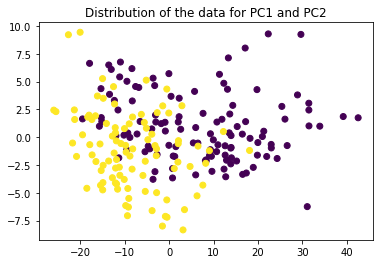

In [484]:
plt.scatter(Z[:,0],Z[:,1],c=y) 
plt.title("Distribution of the data for PC1 and PC2")
plt.show()

Because there are no groups forming visually from the plot, more data is required to make an accurate classification.

## Part B

Check how much information will preserve if we only use the first 10 principal components (in other words, calculate the percentage of information we describe if instead of using all 4000 variables, we use the first 10 PCs).



In [485]:
# calculate total variance of first 10 principal components
v_pc = 0
for i in range(10):
    v_pc += np.var(Z.T[i])

# calculate total variance of dataset
v_dataset = 0
for col in X.T:
    v_dataset += np.var(col)

contribution_pc = 100 * v_pc / v_dataset

print(f"The first 10 principal components can describe {round(contribution_pc, 2)}% of the information in the dataset.")

The first 10 principal components can describe 97.22% of the information in the dataset.


## Part C

Build an ANN classifier for this dataset with these new 10 variables (the first 10 PCs), and evaluate your model accuracy.

In [486]:
# use first 10 PCs for building model
X_inputs = Z[:, 0:10]

### Split the dataset into training and test sets

In [487]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_inputs, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [488]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Build the Model

In [489]:
cancerModel=tf.keras.models.Sequential()
cancerModel.add(tf.keras.layers.Dense(4,activation='relu'))
cancerModel.add(tf.keras.layers.Dense(2,activation='relu'))
cancerModel.add(tf.keras.layers.Dense(3,activation='softmax'))
cancerModel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cancerModel.fit(X_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
22/22 [==============================] - 0s 697us/step - loss: 1.2814 - accuracy: 0.1337
Epoch 2/100
22/22 [==============================] - 0s 784us/step - loss: 1.2128 - accuracy: 0.2151
Epoch 3/100
22/22 [==============================] - 0s 643us/step - loss: 1.1585 - accuracy: 0.2616
Epoch 4/100
22/22 [==============================] - 0s 660us/step - loss: 1.1146 - accuracy: 0.3488
Epoch 5/100
22/22 [==============================] - 0s 643us/step - loss: 1.0780 - accuracy: 0.4477
Epoch 6/100
22/22 [==============================] - 0s 641us/step - loss: 1.0472 - accuracy: 0.5233
Epoch 7/100
22/22 [==============================] - 0s 665us/step - loss: 1.0169 - accuracy: 0.6163
Epoch 8/100
22/22 [==============================] - 0s 623us/step - loss: 0.9900 - accuracy: 0.6802
Epoch 9/100
22/22 [==============================] - 0s 683us/step - loss: 0.9631 - accuracy: 0.7442
Epoch 10/100
22/22 [==============================] - 0s 643us/step - loss: 0.9370 - accura

22/22 [==============================] - 0s 760us/step - loss: 0.0424 - accuracy: 0.9884
Epoch 82/100
22/22 [==============================] - 0s 760us/step - loss: 0.0418 - accuracy: 0.9884
Epoch 83/100
22/22 [==============================] - 0s 760us/step - loss: 0.0413 - accuracy: 0.9942
Epoch 84/100
22/22 [==============================] - 0s 760us/step - loss: 0.0405 - accuracy: 0.9942
Epoch 85/100
22/22 [==============================] - 0s 807us/step - loss: 0.0397 - accuracy: 0.9942
Epoch 86/100
22/22 [==============================] - 0s 760us/step - loss: 0.0391 - accuracy: 0.9942
Epoch 87/100
22/22 [==============================] - 0s 760us/step - loss: 0.0387 - accuracy: 0.9942
Epoch 88/100
22/22 [==============================] - 0s 760us/step - loss: 0.0379 - accuracy: 0.9942
Epoch 89/100
22/22 [==============================] - 0s 807us/step - loss: 0.0376 - accuracy: 0.9942
Epoch 90/100
22/22 [==============================] - 0s 807us/step - loss: 0.0365 - accuracy: 

### Evaluate the Model's Accuracy

In [490]:
cancerModel.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.9070


[0.18309465050697327, 0.9069767594337463]

### Prediction on the Test Set

In [491]:
y_pred = np.argmax(cancerModel.predict(X_test), axis=1)

2/2 [==============================] - 0s 997us/step


### Confusion Matrix

In [492]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = (y_pred > 0.5) #Classification metrics can't handle a mix of binary and continuous targets, so we change the target (y_pred) to binary, True/False
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for ANN")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print('\nAverage model prediction accuracy: {:.2%}\n'.format(accuracy))

Confusion matrix for ANN
[[18  2]
 [ 2 21]]

Average model prediction accuracy: 90.70%



### Comparison to Other Classifiers

#### KNN

In [493]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # change n_neighbors; boundary becomes smoother with increasing value of K
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
# accuracy = np.sum(y_pred==y_test)/len(y_test)
# print(accuracy)

0.9302325581395349


#### Support Vector Machine

In [494]:
from sklearn.svm import SVC
svmrbf = SVC(kernel='rbf')
svmrbf.fit(X_train, y_train)
y_pred = svmrbf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9069767441860465


#### Naive Baye

In [495]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.813953488372093


KNN had a high accuracy score similar to ANN, while SVM and Naive Baye had lower than ANN.

### Trying the Model with all PCs

In [496]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(Z, y, test_size = 0.2, random_state = 0)

In [497]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train_2)
X_test_2 = sc.transform(X_test_2)

In [498]:
cancerModel2=tf.keras.models.Sequential()
cancerModel2.add(tf.keras.layers.Dense(4,activation='relu'))
cancerModel2.add(tf.keras.layers.Dense(2,activation='relu'))
cancerModel2.add(tf.keras.layers.Dense(3,activation='softmax'))
cancerModel2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cancerModel2.fit(X_train_2, y_train_2, batch_size = 8, epochs = 100)

Epoch 1/100
22/22 [==============================] - 0s 712us/step - loss: 1.1225 - accuracy: 0.6047
Epoch 2/100
22/22 [==============================] - 0s 665us/step - loss: 1.0843 - accuracy: 0.6105
Epoch 3/100
22/22 [==============================] - 0s 665us/step - loss: 1.0479 - accuracy: 0.6105
Epoch 4/100
22/22 [==============================] - 0s 665us/step - loss: 1.0141 - accuracy: 0.6105
Epoch 5/100
22/22 [==============================] - 0s 712us/step - loss: 0.9805 - accuracy: 0.6395
Epoch 6/100
22/22 [==============================] - 0s 712us/step - loss: 0.9483 - accuracy: 0.6744
Epoch 7/100
22/22 [==============================] - 0s 712us/step - loss: 0.9141 - accuracy: 0.6860
Epoch 8/100
22/22 [==============================] - 0s 712us/step - loss: 0.8762 - accuracy: 0.7035
Epoch 9/100
22/22 [==============================] - 0s 712us/step - loss: 0.8397 - accuracy: 0.7151
Epoch 10/100
22/22 [==============================] - 0s 665us/step - loss: 0.7995 - accura

22/22 [==============================] - 0s 665us/step - loss: 0.0207 - accuracy: 0.9884
Epoch 82/100
22/22 [==============================] - 0s 665us/step - loss: 0.0201 - accuracy: 0.9884
Epoch 83/100
22/22 [==============================] - 0s 617us/step - loss: 0.0196 - accuracy: 0.9884
Epoch 84/100
22/22 [==============================] - 0s 665us/step - loss: 0.0191 - accuracy: 0.9884
Epoch 85/100
22/22 [==============================] - 0s 665us/step - loss: 0.0187 - accuracy: 0.9884
Epoch 86/100
22/22 [==============================] - 0s 665us/step - loss: 0.0181 - accuracy: 0.9942
Epoch 87/100
22/22 [==============================] - 0s 665us/step - loss: 0.0178 - accuracy: 1.0000
Epoch 88/100
22/22 [==============================] - 0s 665us/step - loss: 0.0174 - accuracy: 1.0000
Epoch 89/100
22/22 [==============================] - 0s 665us/step - loss: 0.0170 - accuracy: 1.0000
Epoch 90/100
22/22 [==============================] - 0s 712us/step - loss: 0.0167 - accuracy: 

In [499]:
cancerModel2.evaluate(X_test_2, y_test_2)

2/2 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9302


[0.10559224337339401, 0.930232584476471]

It is roughly the same accuracy with using all PCs.